# Linear regression, part 1

The method of regression is one of the oldest and most widely used analytics methods. The goal of regression is to produce a model that represents the ‘best fit’ to some observed data. Typically the model is a function describing some type of curve (lines, parabolas, etc.) that is determined by a set of parameters (e.g., slope and intercept). “Best fit” means that there is an optimal set of parameters according to an evaluation criteria we choose.

A regression model attempts to predict the value of one variable, usually known as the **dependent variable**, **response variable** (**target** or **label** in ML linguo), using the values of other variables, known as **independent variables**, **explanatory variables**, or **covariates** (**features** in ML linguo). Linear regression is the foundational form of regression, which includes a broader set of models. To solve linear regression, normally the **method of least squares** is used.  Here, we are looking to find parameters of the function that minimizes the square of the error between the predictions, which are the function output, and the observed target values. These errors are also called **residuals**. Note that the word **regression** refers to a larger family of models in statistics including linear and logistic regression, whereas in the ML community it usually refers to training a supervised learning algorithm on a data set with a **numeric target**, as oppsed to **classificaiton** where the target is categorical. So we need to know from context which is being referred to.

In [7]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 7]
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as statsmodels
import statsmodels.formula.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

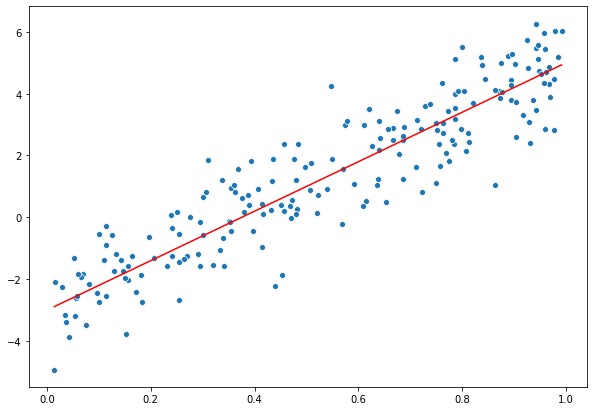

In [8]:
beta_0 = -3 # the intercept
beta_1 = 8 # the slope

x_data = np.random.uniform(0, 1, size = 200)
error = np.random.normal(0, 1, size = 200)
y_data = beta_0 + beta_1 * x_data + error

sns.scatterplot(x_data, y_data)
sns.lineplot(x_data, beta_0 + beta_1 * x_data, color = 'red');

As you can see, the data above was generated using $\beta_0 = -3$ (the intercept term) and $\beta_1 = 8$ (the slope). The terms $\beta_0$ and $\beta_1$ are the population parameters which linear tries to estimate. In other words, it tries to find $b_0$ and $b_1$ that are **estimates** for $\beta_0$ and $\beta_1$. 

The word **estimate** refers to the fact that $b_0$ and $b_1$ are derived from a sample. Here we are simulating data, so In real life, unless we simulate the data like we did above, we don't know $\beta_0$ and $\beta_1$. In fact, in practice, we aren't even sure if the relationship is between $X$ and $Y$ is best described as an equation like $Y = \beta_0 + \beta_1 X + \text{error}$ in linear regression (or some other equation using another equation-based algorithm) or even a **rule-based** model like tree-based models. A simple rule-based model would say something like this:

$$
\begin{equation*}
Y = \begin{cases}
             -1  & \text{if } x < 0.5 \\
              2  & \text{if } x \ge 0.5
     \end{cases} \quad
\end{equation*}
$$

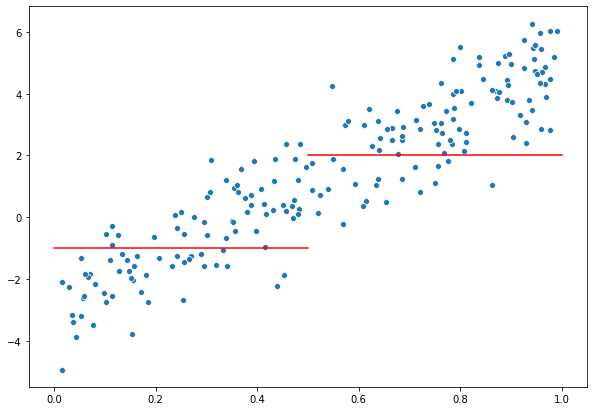

In [9]:
sns.scatterplot(x_data, y_data)
sns.lineplot([0, 0.5], [-1, -1], drawstyle = 'steps', color = 'red')
sns.lineplot([0.5, 1], [2, 2], drawstyle = 'steps', color = 'red');

Of course, a rule like the above can also be written as an equation and the distinction between rule-based and equation-based algorithms is not that important in practice. The above example suggests that our rule-based model would do a poor job compared to the equation-based one. But rule-based algorithms have their advantages too. For example, they can do better when we have lots of categorical variable and they make fewer assumptions about the data.

## Training models in Python

Now, you are ready to build and evaluate the model using Python. Python has libraries that contain linear modeling capabilities. The first python library that is popular for linear regression is `sklearn`, which contains many other machine learning algorithms besides linear regression. The second library is called `statsmodels`.  For those that have experience with the programming language, R, this library is the most similar because it provides easy statistical analysis of linear models that are fitted to the data. To start, we will show how to use the `sklearn` for linear regression.

If we have a single feature like we do here, we have to reshape the data first so every data point (row) is itself an array.

In [10]:
x = x_data.reshape(-1, 1)
y = y_data.reshape(-1, 1)

We can now train a linear regression model on the data and then get predictions.

In [11]:
regression_model = LinearRegression() # initialize model
regression_model.fit(x, y)  # fit (or train) a model
y_pred = regression_model.predict(x) # predict using a model

Here's how we can extract the coefficients, i.e. **intercept** $a$ and **slope** $b$.

In [12]:
print('slope:' ,regression_model.coef_)
print('intercept:', regression_model.intercept_)

slope: [[7.81073552]]
intercept: [-2.85569319]


Notice that $a$ and $b$ are close to $alpha$ and $beta$. We can also derive the **root mean squared error** $\text{RMSE}$ and the **coefficient of determination** $R^2$ for the model.

In [13]:
rmse = mean_squared_error(y, y_pred) # obtain RMSE
r2 = r2_score(y, y_pred) # obtain R^2
print('RMSE: ', rmse)
print('R^2 score: ', r2)

RMSE:  1.0341083418301842
R^2 score:  0.837707214746594


### Exercise

- Instead of plotting $X$ against $Y$, plot $X$ against $Y - \hat Y$ which is the residual. In statistics, we often use the **hat notation** to indicate something is a predicted value. It's also useful to draw a horizontal line at zero residuals to see the center of the data. HINT: Don't forget to use `reshape` if you need to flatten the array.

In [15]:
sns.scatterplot(x=x, y=y_pred)

ValueError: If using all scalar values, you must pass an index

- It's important to look at the residual plot because if the model did a good job capturing the trend in the data, then what remains (the residuals) should look random. If the residuals don't look random, there maybe room for more complex models. Here's an example: Let's say our data looks like this now.

- It may not be very obvious, but it looks like the true relationship should be a curved line, not a straight line. But ignore this for now and fit a straight line anyway. Then draw the above scatterplot and plot the line.

- Try to picture what the residual plot will look like based on the scatter plot above. Then draw the residual plot and confirm your intuition.

- Now plot the distribution of the residuals, which is another graphic we often look at. Is the same tendency we observed above also visible in the distribution of the residuals?

A residual plot like the above suggests the model is **biased**. We can see for example that when $X$ is in the $(0, 2)$ range, the model's predictions are consistantly higher than the observed values for $Y$. This means that after fitting a straight line, there's still *information* about the true relationship between $X$ and $Y$ that we've left on the table. In other words, the line wasn't completely useless, but it wasn't enough either.

- Fit a new model to the data that includes the original feature $X$, but also a new feature $X^2$. Note that we are calling the feature $X^2$ to call out the obvious: that it can be directly obtained from $X$ by squaring it, but it could have been any other feature $Z$ with any relationship to $X$ or none at all. HINT: To train a model with two features, we need to combine $X$ and $X^2$ into a single array, which we can do using `X = np.concatenate([x, x**2], axis = 1)`.

- Examine the scatter plot and the trend line of the new model. Does the model seem like a good fit?

What we did above is sometimes referred to as **polynomial regression**, because by adding polynomial terms like $X^2$ we can add non-linearity to the relationship between $X$ and $Y$. 

**IMPORTANT:** Polynomial regression is still considered **linear regression**. This is because the word **linear** in linear regression means linear *in the parameters*, not in the features. So transformations of features are allowed, as long as we preserve linearity in the parameters. For example here's another linear regression model:

$$\log(Y) = \beta_0 + \beta_1 \log(X_1) + \beta_2 X_1^2 + \text{error}$$

And here's a model that is not linear in the parameters:

$$Y = \beta_0 + \frac{\beta_1 X_1}{\beta_2 \exp(X_1)} + \text{error}$$

Sometimes we can turn a non-linear model into a linear model by applying the right transformation.

### End of exercise

Let's now go back to the data that we started with initially.

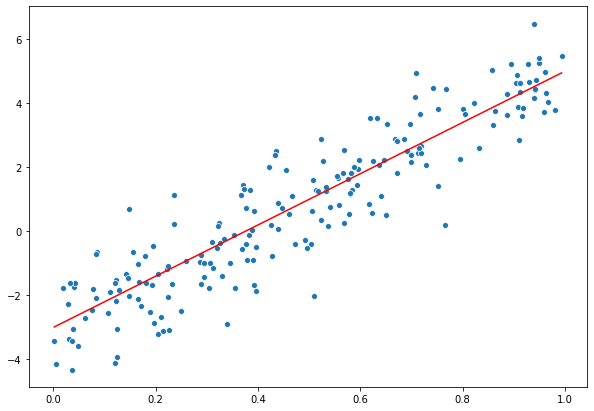

In [18]:
beta_0 = -3 # the intercept
beta_1 = 8 # the slope

x_data = np.random.uniform(0, 1, size = 200)
error = np.random.normal(0, 1, size = 200)
y_data = beta_0 + beta_1 * x_data + error

sns.scatterplot(x_data, y_data)
sns.lineplot(x_data, beta_0 + beta_1 * x_data, color = 'red');

Notice that this time we took $X$ and $Y$ and stored them into a `DataFrame`. This is because we now want to show how to fit a line with the `statsmodels` package. The model declaration and fitting follow a different format and unlike `sklearn` which works with the original `numpy` array objects, with `statsmodel` using a `DataFrame` simplifies things. 

The model we train below uses `ols` which stands for **ordinary least squares**, which is a fancy term for linear regression. Yes, the field of statistics and machine learning is full of redundant terminology!

In [19]:
sim_data = pd.DataFrame({'x': x_data, 'y': y_data})

ols_model = sm.ols(formula = 'y ~ x', data = sim_data)
# ols_model = sm.OLS(y_output, sm.add_constant(x_input)) # alternative way using arrays

ols_model = ols_model.fit() # fit the model

print('Intercept: {0:.5f}'.format(ols_model.params.Intercept))
print('Slope : {0:.5f}'.format(ols_model.params.x))

Intercept: -3.14636
Slope : 8.15645


In [21]:
sim_data['y_pred'] = ols_model.predict(sim_data)
sim_data['resid'] = sim_data['y'] - sim_data['y_pred']
sim_data.head()

,x,y,y_pred,resid
0,0.303434,-1.774017,-0.671418,-1.102599
1,0.312443,-1.147136,-0.597941,-0.549195
2,0.366118,1.144630,-0.160138,1.304768
3,0.860202,3.306579,3.869827,-0.563249
4,0.993463,5.479144,4.956769,0.522375


### Interpreting the coefficients

It is very important to know how to interpret the model's coefficients:
- The **intercept** is the average value of $Y$ when x is zero. This can have a good interpretation as long as $X = 0$ makes sense. For example, if $X$ is age and $Y$ is height, then the interpect is your height at birth.
- The **slope** is the change in $Y$ we should expect to see **on average**, if we increase $X$ by 1 unit. So in our example, the slop is how much you grow by on average as you get a year older. A negative slope corresponds to a decrease and a positive slop an increase in $Y$.

In [23]:
ols_model = sm.ols(formula = 'y ~ x', data = sim_data)
ols_model = ols_model.fit()
print('Intercept = {:6.2f}, Slope = {:6.2f}'.format(*ols_model.params))

Intercept =  -3.15, Slope =   8.16


### Exercise

The interpretation of the interpect doesn't change with many features, but the interpretation of the slope gets a little more involved if we have more than one feature. Let's say for example that we have features $X_1$ and $X_2$. Then the model is

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \text{error}$$

The model we fit will be an estimate of the above model:

$$\hat Y = b_0 + b_1 X_1 + b_2 X_2$$

where the **parameters** $\beta_i$ are replaced with **statistics** $b_i$. In the context of regression we refer to these statistics more commonly as **coefficients**. Note that to avoid clutter, we dropped the row index from all the notation we use in this notebook. So $\hat Y = b_0 + b_1 X_1 + b_2 X_2$ should really read as 

$$\hat Y^{(j)} = b_0 + b_1 X_1^{(j)} + b_2 X_2^{(j)}$$ 

for all rows $j = 1, \cdots, n$, but since this is clear from context, it's easier to drop the row index. This also applied to any summation we use in the notebook without an index.

- Go over the interpretaion of the **intercept** and **slope** and apply them to the context of having two features. Do you think the inerpretations are still valid? If not, how would you refrase them to make them more exact.

- The `statsmodel` library has the advantage of giving us statisical summaries and diagnostic plots. Many of these statistics can be obtained directly by calling the `summary` method. Examine the results below. Where the intercept and slope are listed, you will find their values as well a a P-value. Based on what you know about hypothesis testing what do you think the null and alternative hypotheses are in this case, and what conclusion do we draw from the p-values?

print(ols_model.summary())

### End of exercise

## Evaluating regression models

Linear regression makes some assumptions about the data: 

1. The variation is only in the $Y$ direction, meaning that the features are assumed to be given and fixed.
1. We assume the data points are inpendendent. This is an important assumption. It says that we cannot use linear regression on time series data or any sequential data where data points are **auto-correlated** (e.g. the price of a stock today depends partly on the price yesterday, two days ago and so on).
1. The errors or residuals are assumed to follow a normal distribution with mean zero and constant variance: The property of constant variance is also called **homoskedasticity**.

The errors of a regression model can be visualized as shown in the figure below. 

![](./images/linear-regression.jpg)

If we want to know how well we did, we must consider what a good benchmark would be.  A common easy benchmark is to see if we can predict better than just the mean of the target variable.

If we denote the mean of the target variable as $\bar Y$, the individual target value at point $i$ with $Y_i$ and its corresponding prediction with $\hat Y_i$, then we can defind the following error metrics:

- The **explained sum of squares (ESS)** is the value that the method of least squares was able to minimize to with the best fit line.

$$\text{ESS} = \sum \left( Y_i - \hat Y_i \right)^2$$

- The **total sum of squares (TSS)** is a measure of how bad a prediction the target-mean would be.

$$\text{TSS} = \sum \left( Y_i - \bar Y \right)^2$$

- The **residual sum of squares (RSS)** (also called sum of squared residuals) is just the difference between  TSS and ESS.  You can also think of this as a measurement of how much better we are explaining the variation than the mean.

$$\text{RSS} = \sum \left( \hat{Y_i} - \bar Y \right)^2$$

We leave it to you to show that $\text{TSS} = \text{ESS} + \text{RSS}$. The ratio $R^2 = \frac{\text{ESS}}{\text{TSS}}$ is called the **coefficient of determination**. It represents the percentage of the variation in the $Y$ that is explain away by using $X$ to predict $Y$. If this ratio is close to 1, it means that the when $Y$ moves, the move corresponds to changes in $X$ (we need to be careful and avoid suggesting any causation here).

By dividing $\text{RSS}$ by the number of data points we get the **mean squared error ($\text{MSE}$)**, whose squared root gives the root mean squared error or **RMSE**, which is the most common metric by which we evaluate regression models. Think of the $\text{MSE}$ as variance and $\text{RMSE}$ as the standard deviation of the errors (residuals).

The goal of regression is to minimize the residual error, $\text{RSS}$. Specifically we wish to explain the maximum amount of the variance in the original data as possible with our model. We can quantify this idea with $\text{RSS} \rightarrow 0$ and $R^2 \rightarrow 1$.

In [25]:
y = sim_data['y']
y_bar = np.mean(y)
y_pred = ols_model.predict(sim_data['x'])

TSS = np.sum((y - y_bar)**2)
RSS = np.sum((y - y_pred)**2)
ESS = np.sum((y_pred - y_bar)**2)
assert(abs(TSS - ESS - RSS) < 0.0001) # check to make sure they are equal

print('TSS: \t{:6.2f}'.format(TSS))
print('ESS: \t{:6.2f}'.format(ESS))
print('RSS: \t{:6.2f}'.format(RSS))
print('RMSE:\t{:6.2f}'.format(np.sqrt(ols_model.mse_resid)))

TSS: 	1240.39
ESS: 	1044.19
RSS: 	196.20
RMSE:	  1.00


## Leverage and Cook's Distance

Up to now, we have only looked at regression models with normally distributed noise. But, in the real world there are errors that can be considered outliers in data. These outliers can have greater or lesser effect on the regression line, depending on how extreme they are and their placement with respect to the other data.

You can imagine a regression line as a lever. Outliers that occur near the ends of the lever will have a greater influence all other factors being equal. One way to measure influence of a data point is **Cook's distance**. The actual calculation is not so important, but the important thing to know is that Cook's distance measures how sensitive the regression coefficients are to any particular data point, and they do so by measuring how much the coefficients would change if we *remove* that data point.

Here's an example of fitting a model with an without a particular data point.

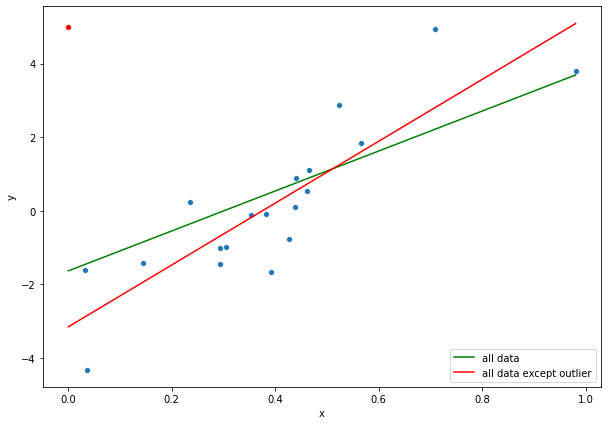

In [26]:
sample = sim_data.sample(20).reset_index(drop = True)
sample.iloc[0, [0, 1]] = (0.0, 5.0) # introduce an outlier
sns.scatterplot('x', 'y', data = sample)
sns.scatterplot([0], [5], color = 'red');

x = sample['x']

ols_model = sm.ols(formula = 'y ~ x', data = sample)
ols_model = ols_model.fit() # fit the model
sns.lineplot(x, ols_model.predict(x), color = 'green', label = 'all data')

ols_model = sm.ols(formula = 'y ~ x', data = sample.drop(index = 0))
ols_model = ols_model.fit() # fit the model
sns.lineplot(x, ols_model.predict(x), color = 'red', label = 'all data except outlier');

As you can imagine, using Cook's distance can be very computationally expensive if we have a large data set. We used a small sample of the original data in the above example because otherwise the difference would be insignificant unless the data has lots of serious outliers. To check for that we can just check to see how closely the residuals follow a normal distribution. Serious deviations from the normal distribution can be a problem.

In [27]:
outlier_linear = sm.ols(formula = 'y ~ x', data = sim_data).fit()
y_outlier = outlier_linear.predict(sim_data['x'])

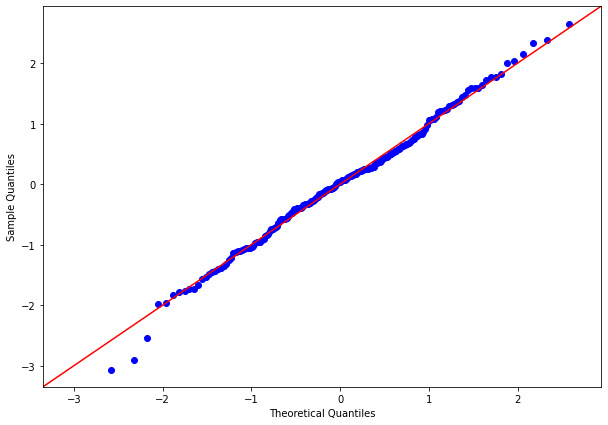

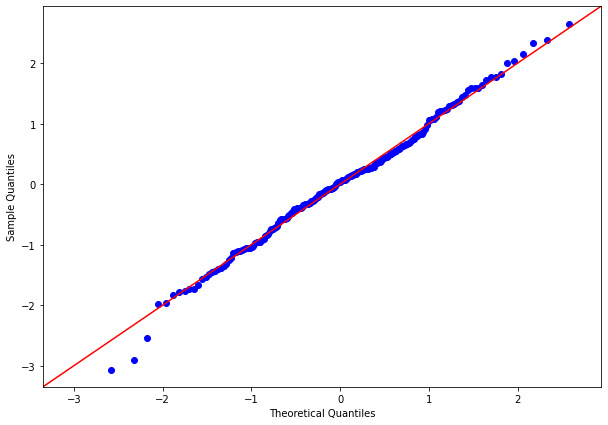

In [28]:
residuals = outlier_linear.resid
statsmodels.qqplot(residuals, stats.norm, fit = True, line = '45')

### Exercise

We saw how we can use Cook's distance to see how sensitive our model's coefficients are to individual data points. A more wholistic approach we can take for this is by retraining the same model many many times, each time using a **bootstrap sample** of the original data `sim_data`. We can then plot the original regression line and all the bootstrap regression lines to see how much the regression line **wiggles** around.

You will need to do the following in one cell:

- Fit a linear regression to `sim_data` and plot the scatter plot and the fitted line (in red).
- Using 100 iterations, do the following:
  - Resample the data with replacement (keeping the original number of rows).
  - Fit a linear regression to the bootstrap sample and obtain the predictions.
  - Overlay the bootstrap regression lines on the scatter plot. You can do this by just calling `sns.lineplot` every time, and let `alpha = 0.1` so the lines have some transparency.

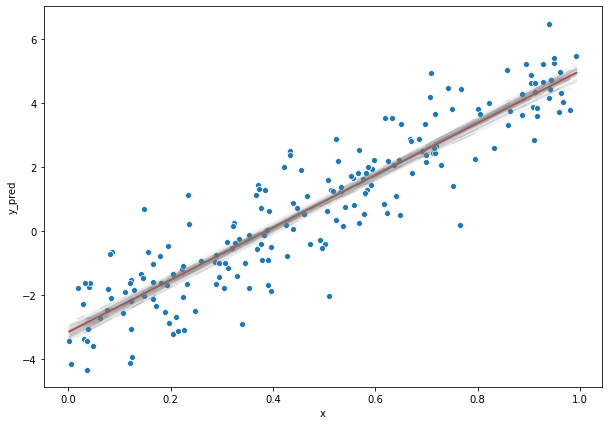

In [37]:
ols_model = sm.ols(formula = 'y ~ x', data = sim_data)
ols_model = ols_model.fit()
sim_data['y_pred'] = ols_model.predict(sim_data['x'])
sns.scatterplot('x', 'y', data = sim_data)
sns.lineplot('x', 'y_pred', color = 'red', data = sim_data)

n_boots = 50
for i in range(n_boots):
    sampl_data = sim_data.sample(frac=1, replace=True)
    ols_model = sm.ols(formula = 'y ~ x', data = sampl_data).fit()
    sampl_data['y_pred'] = ols_model.predict(sampl_data['x'])
    sns.lineplot('x', 'y_pred', color = 'grey', data = sampl_data, alpha = 0.1)

### End of exercise

## Multiple linear regression

So far we had one target $Y$ and one feature $X$. Let's now allow for $p$ features $X_1, \cdots, X_p$. We lose the ability to visually see the model, but algebraically things don't change by much. We can now express the model as such:

$$Y = \beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p + \text{error}$$

Geometrically, the above equation (minus the error term) describes a $p-$dimensional **hyperplane**, but this geometric description is somewhat limited: We saw for example that if we let $p = 2$ with $X_1 = X$ and $X_2 = X^2$ then the relationship between $X$ and $Y$ can be described as a curve, even though the model itself treats $X_2$ as just another dimension so $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2$ spans a 2D hyperplane in 3D space. So it's probably best to leave aside the geometric interpretation for now.

Almost everything we learned about simple linear regression still holds for the case of multiple linear regression.  But a few new challenges also present themselves.

If we have two variables $X_1$ and $X_2$, then we can train two kinds of model: one model is the standard model with only the **main effects** $\beta_1$ and $\beta_2$ which we introduced above, and a model that also includes a new term $\beta_{12}X_1X_2$ which we call an **interaction term**:

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_{12} X_1X_2 + \text{error}$$

We include the interaction term if we suspect that the effect of $X_1$ on $Y$ can change depending on the value of $X_2$. Interaction terms are another example of polynomial terms. In fact, here's the full model if we include all second-degree polynomial terms:

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + + \beta_{11} X_1^2 + \beta_{22} X_2^2 + \beta_{12} X_1X_2 + \text{error}$$

This means that we open ourselves to many different models if we have many features and want to capture additional non-linearity using polynomial terms. So how do we know which model to choose? The answer may not be so simple. It's like asking a chef how many ingredients to include in a dish. We know that some ingredients go well together but crash with others. We know that having too many ingredients can overdo it. But finding the right balance is an art and a science. Similarly, here are some general rules to guide us to select the right model:

- We follow **Okam's razor**: If a simpler model can predict with similar accuracy as the more complex model, then we choose the simpler model. A model with too many parameters is said to be **over-parametrized**. In practice, we can apply this principle using **regularization** (we cover this topic in a later lesson).
- We want to avoid having too many features that are highly correlated among each other. We refer to this as the problem of **multi-collinearity**, and it can result in unstable predictions and **over-fitting**.
- We must be careful with model evaluation: As we saw earlier, adding additional variables can inflate the performance of a model. For example, $R^2$ will almost always increase with additional variable. Instead, we can use performance measures such as the **adjusted $R^2$**, **AIC** or **BIC** that penalize models with too many terms unless they really help to improve performance. We leave it to the reader to learn more about these metrics.
- If we expect a lot of non-linearity we can try more sophisticated models such as support vector regression or neural networks instead of polynomial regression. In fact polynomial regression is not that common in practice.

## Using the matrix notation

If we introduce a variable $X_0 = 1$ for all rows in the data, we can rewrite the multiple regression model as

$$Y = \beta_0 X_0 + \beta_1 X_1 + \cdots + \beta_p X_p + \text{error} = \sum_{i = 0}^p \beta_i X_i + \text{error}$$

The above equation can be rewritten in matrix form as

$$\pmb{Y} = \pmb{X\beta} + \text{error}$$

where we use bold letters to point out that $\pmb{X}$ is the **data matrix** and $\pmb{\beta}$, $\pmb{Y}$ and the errors are now **vectors**. If you are familiar with matrix algebra, then writing the model in matrix form not only simplifies the formula and relieves on of a lot of otherwise tedious index-keeping, but it also makes it easy to implement the computation efficiently when we write it as a program.

Given the above equation, we can say that the goal of linear regression is to find $\pmb{\beta}$ given $\pmb{X}$ and $\pmb{Y}$. If we drop the error term and use some basic **linear algebra**, as long as $\pmb{X}^T\pmb{X}$ is an invertible matrix we can rewrite the equation in terms of $\pmb{\beta}$ as shown here:

$$
\begin{align*}
\pmb{X\beta} = \pmb{Y} & \Rightarrow \pmb{X}^T\pmb{X\beta} \pmb{X}^T\pmb{Y} \\
                 & \Rightarrow (\pmb{X}^T\pmb{X})^{-1}\pmb{X}^T\pmb{X\beta} = (\pmb{X}^T\pmb{X})^{-1}\pmb{X}^T\pmb{Y} \\
                 & \Rightarrow \pmb{\beta} = (\pmb{X}^T\pmb{X})^{-1}\pmb{X}^T\pmb{Y} \\
\end{align*}
$$

The above equation is known as the **normal equation** for linear regression. The normal equation is what we call a **closed-form solution**, because it can be obtained directly using a finite number of algebraic steps (just like the quadratic formula can be used to find the solution to a quadratic equation). Most machine learning algorithms don't have a closed-form solution like this. Instead, we find the solution using **mathematical optimization**, which is an **iterative method**. In practice, even if a closed form solution exist, it may be more efficient to solve the problem numerically using optimization. At a high-level, to find $\pmb{\beta}$ using optimization, we begin with a good guess for $\pmb{\beta}$ and incrementally improve the guess as we try to minimize the **square loss**:

$$\text{argmin}_{\pmb{\beta}} \sum (\pmb{Y} - \pmb{\hat Y})^2$$

If we let the routine run for enough steps, assuming that certain conditions are met, we eventually converge to a solution.

### Exercise

Recall that the HSB2 data contains students' scores in five different subjects.

In [48]:
hsb2 = pd.read_csv('./data/hsb2-2.csv')
X = hsb2[['read', 'write', 'math', 'science']]
Y = hsb2['socst']
hsb2.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


- Use the reading, writing, math and science scores to predict a student's score in social studies. Train your model using `LinearRegression` in `sklearn`. Add the model's predictions to the data as a new column called `socst_pred_skl`.

In [44]:
reg = LinearRegression().fit(X, Y)
hsb2['socst_pred_skl'] = reg.predict(X)
hsb2.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst,socst_pred_skl
0,70,0,4,1,1,1,57,52,41,47,57,52.526194
1,121,1,4,2,1,3,68,59,53,63,61,60.480348
2,86,0,4,3,1,1,44,33,54,58,31,41.859538
3,141,0,4,3,1,3,63,44,47,53,56,52.434954
4,172,0,4,2,1,2,47,52,57,53,61,50.666603


- Train the same model a second time, but this time use `sm.ols` in `statsmodels` to do it. Add the model's predictions to the data as a new column called `socst_pred_ols`.

In [49]:
ols_model = sm.ols(formula = 'socst ~ read + write + math + science', data = hsb2).fit()
hsb2['socst_pred_ols'] = ols_model.predict(hsb2['socst'])
hsb2.head()

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'read' is not defined
    socst ~ read + write + math + science
            ^^^^

- Check that the predictions from the two models are the same. Find the correlation between the true score and predicted scores using either model.

- Print the model summary from the model we trained with `sm.ols`. The formula uses a format similar to `Y ~ X_1 + X_2`. Interpret the model's coefficients and write a few brief sentences about what the model is telling us.

- Find the model's coefficents using the **normal equation** for linear regression. To make it easy, we have created a matrix `M` which is the matrix $X$ with an extra column of 1s for the intercept term. Make sure the results match what's reported in the above model summary. HINT: You can use `np.linalg.inv` to invert a matrix, `np.matmul` to multiply two matrices, and the `transpose()` method to take the transpose of a matrix. 

In [ ]:
M = np.concatenate([np.ones(len(Y)).reshape(-1, 1), X.values], axis = 1)
M[:4, :]
# compute the beta vector

- The `fit` method used by `sm.ols` has an argument called `normalize`. Use it to train the same model but using the normalized features instead. What changes do you notice in the model summary?

NOTE: We say that ordinary least squares is **invariant to normalization**, while other methods we learn later such as lasso or ridge regression are not.

- Train a new model with `sm.ols` but this time only include the reading and writing scores as features. Decide if you should use a model *with or without* interactions. HINT: If you change the formula from `Y ~ X_1 + X_2` to `Y ~ X_1 * X_2` your new model will estimate the main effects `\beta_1` and `\beta_2` and their interaction `\beta_{12}`.

- So far we've only had models with numeric features, but it's possible to also include **categorical features**. Add the term `C(prog)` to the formula. This will add the feature `prog` to the model as a categorical feature. This feature states which of 3 after-school program a student participated in.

- Report the important results in the model summary.

### End of exercise

## OPTIONAL: Visualizing the effect of interaction terms

We finish this notebook with an example to help you build an intuitive understanding of what interaction terms do for a linear regression model. Say you have two variables $X_1$ and $X_2$ and are having to choose between the model with main effects only $Y \approx \beta_1 X_1 + \beta_2 X_2$ or the full model with the interaction term $Y \approx \beta_1 X_1 + \beta_2 X_2 + \beta_{12}X_1X_2$. To help visualize the difference between the two models, we start by generating some data.

In [ ]:
beta_0 = -5 # the intercept
beta_1 = 2 # the slope
beta_2 = 3
beta_12 = 1

x_1 = np.linspace(0, 1, num = 200) # np.random.uniform(0, 20, size = 200)
x_2 = np.linspace(0, 1, num = 200) # np.random.uniform(0, 20, size = 200)
error = np.random.normal(0, 1, size = 200)
y_data = beta_0 + beta_1 * x_1 + beta_2 * x_2 + beta_12 * x_1 * x_2 + error

sim_data = pd.DataFrame({'X_1': x_1, 'X_2': x_2, 'Y': y_data})

Let's now train a model that only considers main effects, using `Y ~ X_1 + X_2` as the formula for `sm.ols`. Once the model is fit, we make predictions for `Y` and we plot the scatter plot of $X_1$ and $Y$ along with the prediction line in red. We then fix the values of $X_2$ to some integer and predict $Y$ again, using a blue line to show the predictions. We repeat this incrementing the integer we fix $X_2$ each time and making the shade of blue slightly lighter every time. What results is the plot below.

In [ ]:
ols_model = sm.ols(formula = 'Y ~ X_1 + X_2', data = sim_data).fit()
sim_data['Y_pred'] = ols_model.predict(sim_data)

sns.scatterplot('X_1', 'Y', data = sim_data)
sns.lineplot('X_1', 'Y_pred', color = 'red', data = sim_data)

for i, ii in enumerate(np.linspace(0, 1, num = 50)):
    sim_data['X_2'] = ii
    sim_data['Y_pred_fix'] = ols_model.predict(sim_data)
    sns.lineplot('X_1', 'Y_pred_fix', color = 'blue', data = sim_data, alpha = (1/(i + 1))**0.7);

We can ignore the points on the plots and just focus on the lines. The pattern we see suggests that one way to intuit about a model with main effects only is that if we slice the prediction hyperplane at some dimension ($X_2$ in our example), then we expect the prediction at the slice to be a hyperplane with one fewer dimension, and the only difference between any two slices is the "height" of the line in the $Y$ dimension. Of course, this is just a different way to describe a hyperplane.

Let's now train a model that only considers main effects, using `Y ~ X_1 + X_2` as the formula for `sm.ols`.

In [ ]:
ols_model = sm.ols(formula = 'Y ~ X_1 * X_2', data = sim_data).fit()
sim_data['Y_pred'] = ols_model.predict(sim_data)

sns.scatterplot('X_1', 'Y', data = sim_data)
sns.lineplot('X_1', 'Y_pred', color = 'red', data = sim_data)

for i, ii in enumerate(np.linspace(0, 1, num = 50)):
    sim_data['X_2'] = ii
    sim_data['Y_pred_fix'] = ols_model.predict(sim_data)
    sns.lineplot('X_1', 'Y_pred_fix', color = 'blue', data = sim_data, alpha = (1/(i + 1))**0.7);

We can now see that the points follow the prediction line, not surprising since that's how the we generated the data. In this new pattern, the prediction at a given slice of $X_2$ is a hyperplane with one fewer dimension where any two slices can have a diiferent slope in the $X_1 \times Y$ space. This means the surface spanned by the equation is not a hyperplane anymore, but a curved surface that looks like a **saddle**. Adding an $X_1^2$ and $X_2^2$ term opens us to other possibile surfaces.

## Summary

So we saw how linear regression takes the concept of hypothesis testing and applies it to the prediction problem. Prediction problems are called **supervised learning** in ML terminology. As we will later see, the family of linear regression models are just one type of prediction algorithm, but in terms of importance they are the most important one as many more sophisticated algorithms such as neural networks build opon the simple ideas presented here. 